# Lab 3 - More Regression
## lecture 3

In [5]:
library('MASS')
data(Boston)

In [6]:
?Boston

Boston {MASS},R Documentation


In [7]:
mod = lm(medv~crim,data=Boston)
summary(mod)


Call:
lm(formula = medv ~ crim, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.957  -5.449  -2.007   2.512  29.800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.03311    0.40914   58.74   <2e-16 ***
crim        -0.41519    0.04389   -9.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.484 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


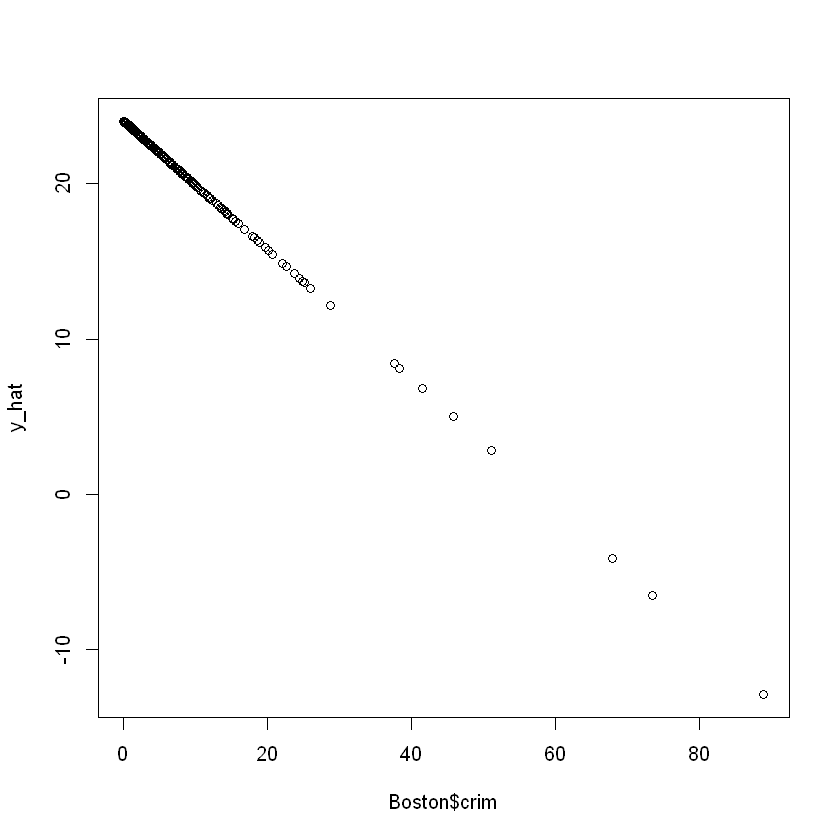

In [9]:
y_hat = predict(mod)
plot(Boston$crim,y_hat)

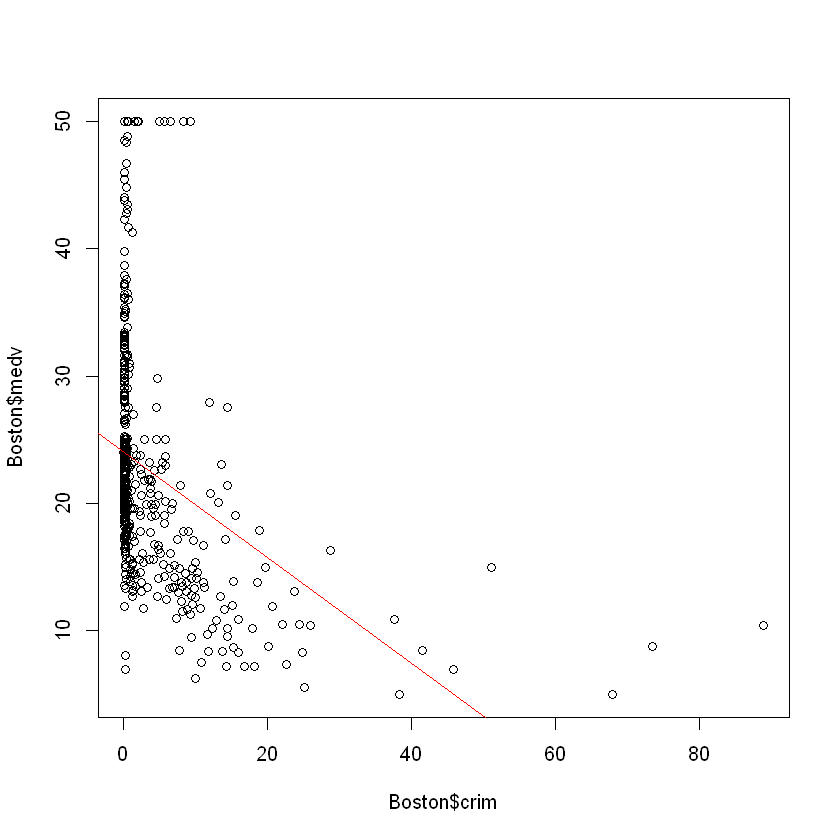

In [12]:
plot(Boston$crim,Boston$medv)
abline(coef=coef(mod),col='red')

# covariate transformations

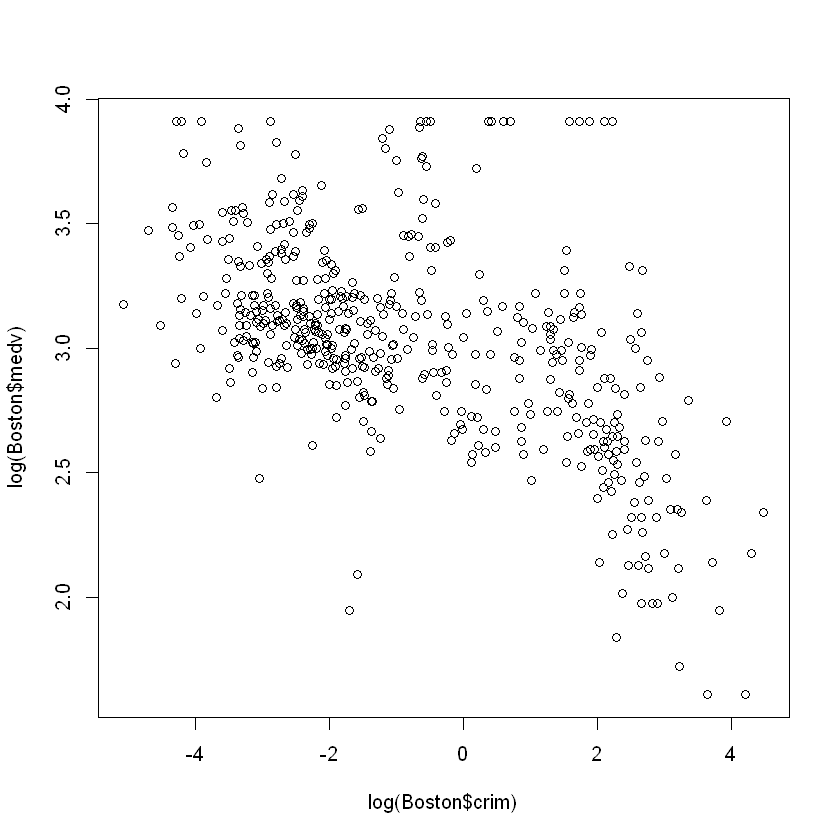

In [13]:
plot(log(Boston$crim),log(Boston$medv))

## variable transformations

In [14]:
mod2 = lm(log(medv)~log(crim),data=Boston)

In [15]:
summary(mod2)


Call:
lm(formula = log(medv) ~ log(crim), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18682 -0.19996 -0.05263  0.17103  1.19958 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.950817   0.015928  185.26   <2e-16 ***
log(crim)   -0.107243   0.006935  -15.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.337 on 504 degrees of freedom
Multiple R-squared:  0.3218,	Adjusted R-squared:  0.3204 
F-statistic: 239.1 on 1 and 504 DF,  p-value: < 2.2e-16


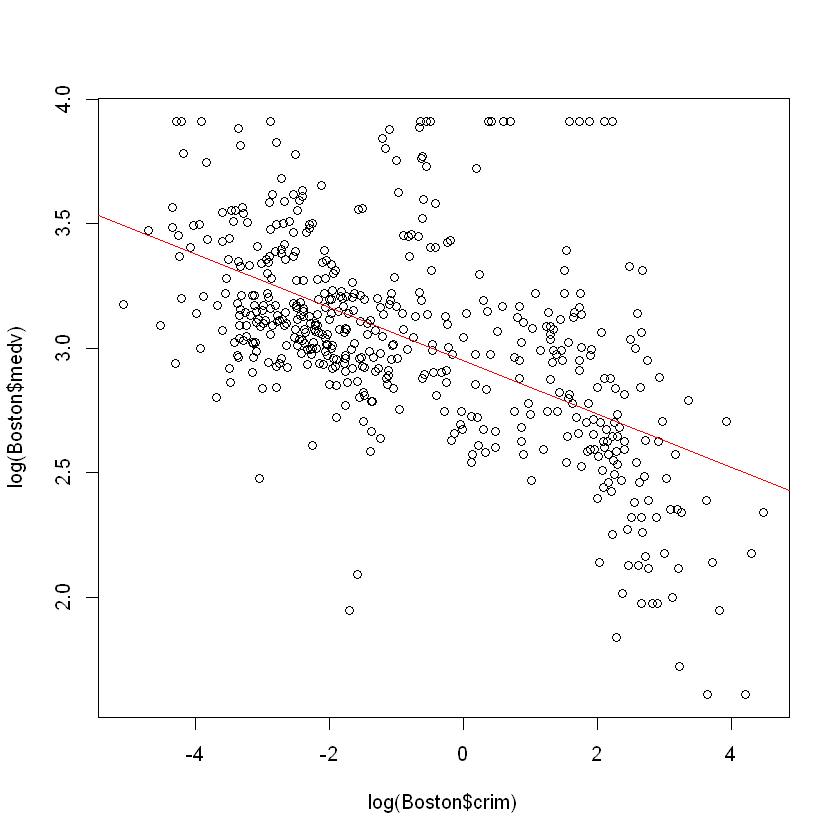

In [18]:
plot(log(Boston$crim),log(Boston$medv))
abline(coef=coef(mod2),col='red')

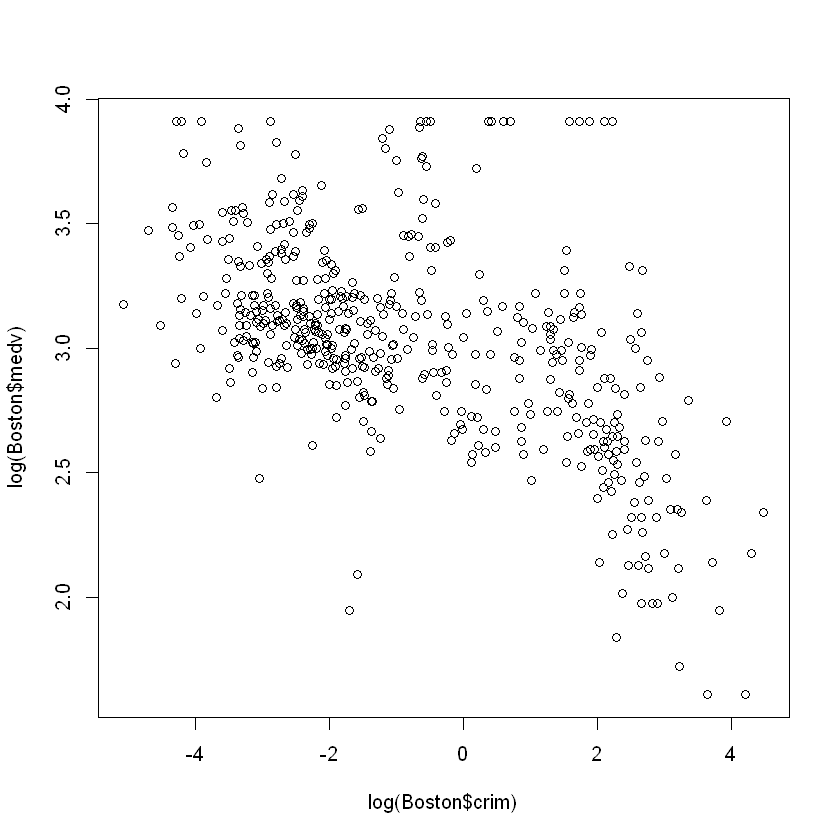

In [37]:
plot(log(Boston$crim),log(Boston$medv))

In [38]:
logmedv = array(log(Boston$medv),c(506,1))
transf_crim = log(Boston$crim)

In [39]:
mod3 = lm(logmedv~transf_crim)
summary(mod3)


Call:
lm(formula = logmedv ~ transf_crim)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18682 -0.19996 -0.05263  0.17103  1.19958 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.950817   0.015928  185.26   <2e-16 ***
transf_crim -0.107243   0.006935  -15.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.337 on 504 degrees of freedom
Multiple R-squared:  0.3218,	Adjusted R-squared:  0.3204 
F-statistic: 239.1 on 1 and 504 DF,  p-value: < 2.2e-16


In [40]:
X = model.matrix(mod3)
head(X)

,(Intercept),transf_crim
1,1,-5.064036
2,1,-3.600502
3,1,-3.601235
4,1,-3.430523
5,1,-2.672924
6,1,-3.511570


In [41]:
head(log(Boston$crim))

[1] -5.064036 -3.600502 -3.601235 -3.430523 -2.672924 -3.511570

In [42]:
beta_hat = ginv(t(X)%*%X)%*%t(X)%*%logmedv

In [31]:
coef(mod3)

(Intercept) transf_crim 
  2.9508168  -0.1072427

# categorical variables

In [44]:
data(birthwt)

In [45]:
?birthwt

birthwt {MASS},R Documentation


In [46]:
head(birthwt)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


In [47]:
head(birthwt$race)

[1] 2 3 1 1 1 3

In [50]:
racef = as.factor(birthwt$race)
head(racef)

[1] 2 3 1 1 1 3
Levels: 1 2 3

In [51]:
levels(racef) = c("White","Black","Other")

In [52]:
head(racef)

[1] Black Other White White White Other
Levels: White Black Other

In [54]:
birthwt$race = racef
mod = lm(bwt~race,data=birthwt)
summary(mod)


Call:
lm(formula = bwt ~ race, data = birthwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2096.28  -502.72   -12.72   526.28  1887.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3102.72      72.92  42.548  < 2e-16 ***
raceBlack    -383.03     157.96  -2.425  0.01627 *  
raceOther    -297.44     113.74  -2.615  0.00965 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 714.5 on 186 degrees of freedom
Multiple R-squared:  0.05017,	Adjusted R-squared:  0.03996 
F-statistic: 4.913 on 2 and 186 DF,  p-value: 0.008336


In [55]:
head(model.matrix(mod))

,(Intercept),raceBlack,raceOther
85,1,1,0
86,1,0,1
87,1,0,0
88,1,0,0
89,1,0,0
91,1,0,1
